In [1]:
#Classification Tree
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
!pip install "pandas<2.0.0"

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
                                                  

In [2]:
data_for_model = pickle.load(open(r"C:\Users\19144\OneDrive\Desktop\Data Science Infinity\Python Fundamentals\Pickle files\abc_classification_modelling.p", "rb")) #rb for reading a file in


In [3]:
data_for_model

,customer_id,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,74,1,3.38,F,0.59,1586.89,195,26,5,61.034231
1,524,1,4.76,F,0.52,2397.26,258,27,5,88.787407
2,607,1,4.45,F,0.49,1279.91,183,22,5,58.177727
3,343,0,0.91,M,0.54,967.14,102,17,5,56.890588
4,322,1,3.02,F,0.63,1566.35,182,30,5,52.211667
...,...,...,...,...,...,...,...,...,...,...
855,372,1,4.38,F,0.50,1381.28,103,12,5,115.106667
856,104,1,2.36,F,0.63,1464.62,127,22,5,66.573636
857,393,1,1.87,M,0.59,2213.97,191,38,5,58.262368
858,373,0,0.21,M,0.47,1446.00,133,22,5,65.727273


In [4]:
data_for_model

,customer_id,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,74,1,3.38,F,0.59,1586.89,195,26,5,61.034231
1,524,1,4.76,F,0.52,2397.26,258,27,5,88.787407
2,607,1,4.45,F,0.49,1279.91,183,22,5,58.177727
3,343,0,0.91,M,0.54,967.14,102,17,5,56.890588
4,322,1,3.02,F,0.63,1566.35,182,30,5,52.211667
...,...,...,...,...,...,...,...,...,...,...
855,372,1,4.38,F,0.50,1381.28,103,12,5,115.106667
856,104,1,2.36,F,0.63,1464.62,127,22,5,66.573636
857,393,1,1.87,M,0.59,2213.97,191,38,5,58.262368
858,373,0,0.21,M,0.47,1446.00,133,22,5,65.727273


In [5]:
data_for_model.drop("customer_id", axis=1, inplace=True) #True so that it is applied


In [6]:
#Shuffle data
#Best practice step
#This aids us in being sensitive to how data is organized - it may or may not have an impact on the model itself
data_for_model = shuffle(data_for_model, random_state=42)

In [7]:
#Class Balance - we need to think about how label/DV is balanced here
data_for_model["signup_flag"].value_counts()

0    593
1    267
Name: signup_flag, dtype: int64

In [8]:
data_for_model["signup_flag"].value_counts(normalize=True)

0    0.689535
1    0.310465
Name: signup_flag, dtype: float64

In [9]:
data_for_model

,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
714,0,1.64,M,0.58,27.81,6,3,3,9.270000
605,0,0.88,M,0.63,26.62,9,3,2,8.873333
120,0,0.56,M,0.62,886.78,154,18,4,49.265556
208,0,0.11,M,0.58,1256.19,168,34,5,36.946765
380,0,1.32,M,0.36,739.67,110,21,3,35.222381
...,...,...,...,...,...,...,...,...,...
71,0,0.07,M,0.57,746.15,133,24,5,31.089583
106,0,1.96,F,0.60,881.49,166,24,4,36.728750
270,0,1.59,M,0.50,319.37,85,17,5,18.786471
435,0,0.71,F,0.54,273.94,74,20,4,13.697000


In [10]:
#Dealing with missing values
data_for_model.isna().sum()

signup_flag             0
distance_from_store     5
gender                  5
credit_score            8
total_sales             0
total_items             0
transaction_count       0
product_area_count      0
average_basket_value    0
dtype: int64

In [11]:
data_for_model.dropna(how = "any", inplace=True) #If any missing values, then whole row is dropped, True so that it is applied

In [12]:
data_for_model.shape

(847, 9)

In [13]:
data_for_model

,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
714,0,1.64,M,0.58,27.81,6,3,3,9.270000
605,0,0.88,M,0.63,26.62,9,3,2,8.873333
120,0,0.56,M,0.62,886.78,154,18,4,49.265556
208,0,0.11,M,0.58,1256.19,168,34,5,36.946765
380,0,1.32,M,0.36,739.67,110,21,3,35.222381
...,...,...,...,...,...,...,...,...,...
71,0,0.07,M,0.57,746.15,133,24,5,31.089583
106,0,1.96,F,0.60,881.49,166,24,4,36.728750
270,0,1.59,M,0.50,319.37,85,17,5,18.786471
435,0,0.71,F,0.54,273.94,74,20,4,13.697000


In [14]:
#We had 394 rows, now we are down to 369 rows

In [15]:
#Split input variables and output variables
X = data_for_model.drop(["signup_flag"], axis=1)
y = data_for_model["signup_flag"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y) #stratify=y this means training and test sets have same proportion of 0s and 1s as overall data 

In [16]:
#Deal with categorical variables
categorical_vars = ["gender"]

one_hot_encoder = OneHotEncoder(sparse_output=False, drop="first") #Drop first encoded column to avoid dummy trap

X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars]) #Want to use fit transform on training data, but transform only on test data 
#Want encoding rules learned on training, and then applied on testing - rules will remain the same
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars]) 

encoder_feature_names = one_hot_encoder.get_feature_names_out(input_features=categorical_vars)

# Run for x_train
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_train.drop(categorical_vars, axis=1, inplace=True)

# Run for x_test
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)
X_test.drop(categorical_vars, axis=1, inplace=True)


In [17]:
X_train #gender is now binary 1s and 0s, and we only have gender_M because of the dummy variable trap

,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value,gender_M
0,1.22,0.60,636.51,123,22,5,28.932273,0.0
1,0.86,0.56,1141.28,112,21,5,54.346667,1.0
2,1.23,0.79,1207.42,210,26,4,46.439231,1.0
3,1.04,0.40,78.18,11,3,2,26.060000,1.0
4,0.07,0.62,740.51,94,24,5,30.854583,1.0
...,...,...,...,...,...,...,...,...
672,0.95,0.45,714.06,135,29,5,24.622759,0.0
673,3.85,0.58,1357.93,210,20,3,67.896500,0.0
674,1.51,0.67,958.23,160,26,5,36.855000,1.0
675,4.49,0.43,1531.61,135,24,5,63.817083,0.0


In [ ]:
X_train #Looks like total sales has been dropped here

In [19]:
#Model Training
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [21]:
#Model assessment
y_pred_class = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test) #predicted probabilties


In [22]:
y_pred_class #This is full of 0s and 1s depending on which class data point is predicted to be in

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [23]:
y_pred_prob
#Probabilities that each data point belongs in either class
# 0 class, 1 class 

array([[0.07142857, 0.92857143],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.94117647, 0.05882353],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.21428571, 0.78571429],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.94117647, 0.05882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.

In [24]:
#We need just prob of consumer being in class 1 = positive
y_pred_prob = clf.predict_proba(X_test)[:,1]
y_pred_prob

array([0.92857143, 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.05882353, 0.        ,
       0.        , 0.78571429, 1.        , 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.05882353, 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.78571429,
       0.        , 1.        , 1.        , 0.        , 0.05882353,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.78571429,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.78571429, 0.        , 0.        , 0.05882353, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

C:\Users\19144\AppData\Local\Temp\ipykernel_4880\1092678375.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster")


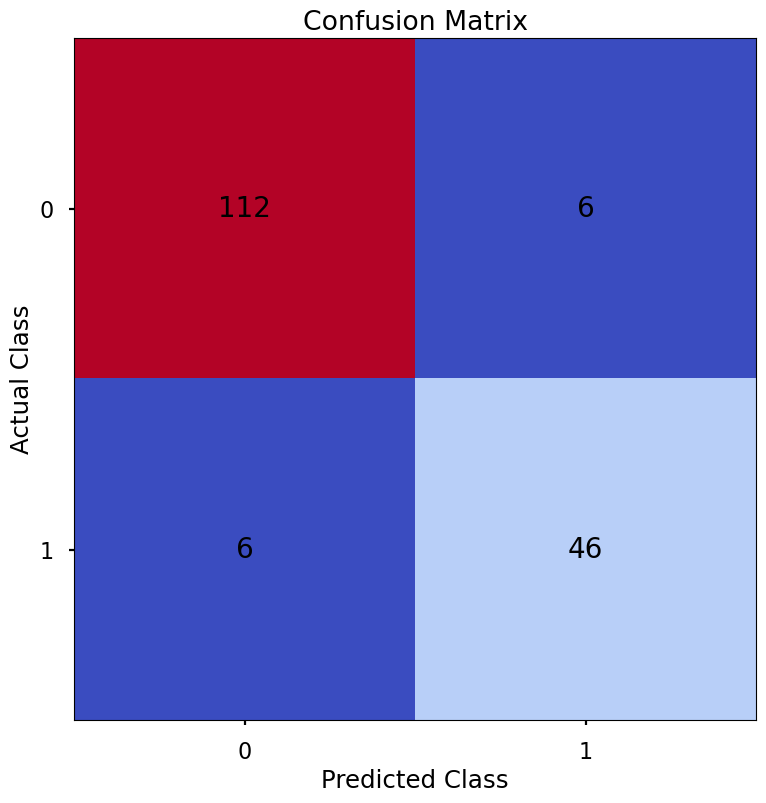

In [25]:
#Confusion matrix

conf_matrix = confusion_matrix(y_test,y_pred_class)

plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap="coolwarm")
plt.gca().xaxis.tick_bottom()#Moves text from top of chart to the bottom
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j, i, corr_value, ha = "center", va = "center", fontsize = 20)
plt.show()

In [26]:
#Accuracy (the numebr of correct classification out of all attempted classifications)
accuracy_score(y_test,y_pred_class)

0.9294117647058824

In [27]:
#Classification accuracy score of 93%
#But slight imbalance in data set

#Precision (of all observations that were predicted as positive, how many were actually positive)
precision_score(y_test,y_pred_class)
#Each time we predicted a positive class, we were right 88% of the time

0.8846153846153846

In [28]:
#Recall (of all positive observations, how mayn did we predict as positive)
recall_score(y_test, y_pred_class)

#Out of all the actual positive cases, the model correctly identified 88% of them
#6 errors for FP and FN, so recall and precision have same percentage

0.8846153846153846

In [29]:
#F1 score (the harmonic mean of precision and recall)
f1_score(y_test,y_pred_class)
#88% - this is important to measure, especially since data is imbalanced

0.8846153846153846

In [42]:
#Finding the best max_depth
max_depth_list = list(range(1,15))
accuracy_scores = []

for depth in max_depth_list:
    clf = DecisionTreeClassifier(max_depth = depth, random_state=42)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = f1_score(y_test,y_pred)
    accuracy_scores.append(accuracy)

In [43]:
accuracy_scores

[0.6857142857142857,
 0.7741935483870968,
 0.8347826086956521,
 0.7659574468085106,
 0.8846153846153846,
 0.9056603773584906,
 0.9038461538461539,
 0.8846153846153846,
 0.9245283018867925,
 0.8952380952380953,
 0.8952380952380953,
 0.8952380952380953,
 0.8952380952380953,
 0.8952380952380953]

In [44]:
max_accuracy = max(accuracy_scores)
max_accuracy_idx = accuracy_scores.index(max_accuracy)
optimal_depth = max_depth_list[max_accuracy_idx]
optimal_depth

9

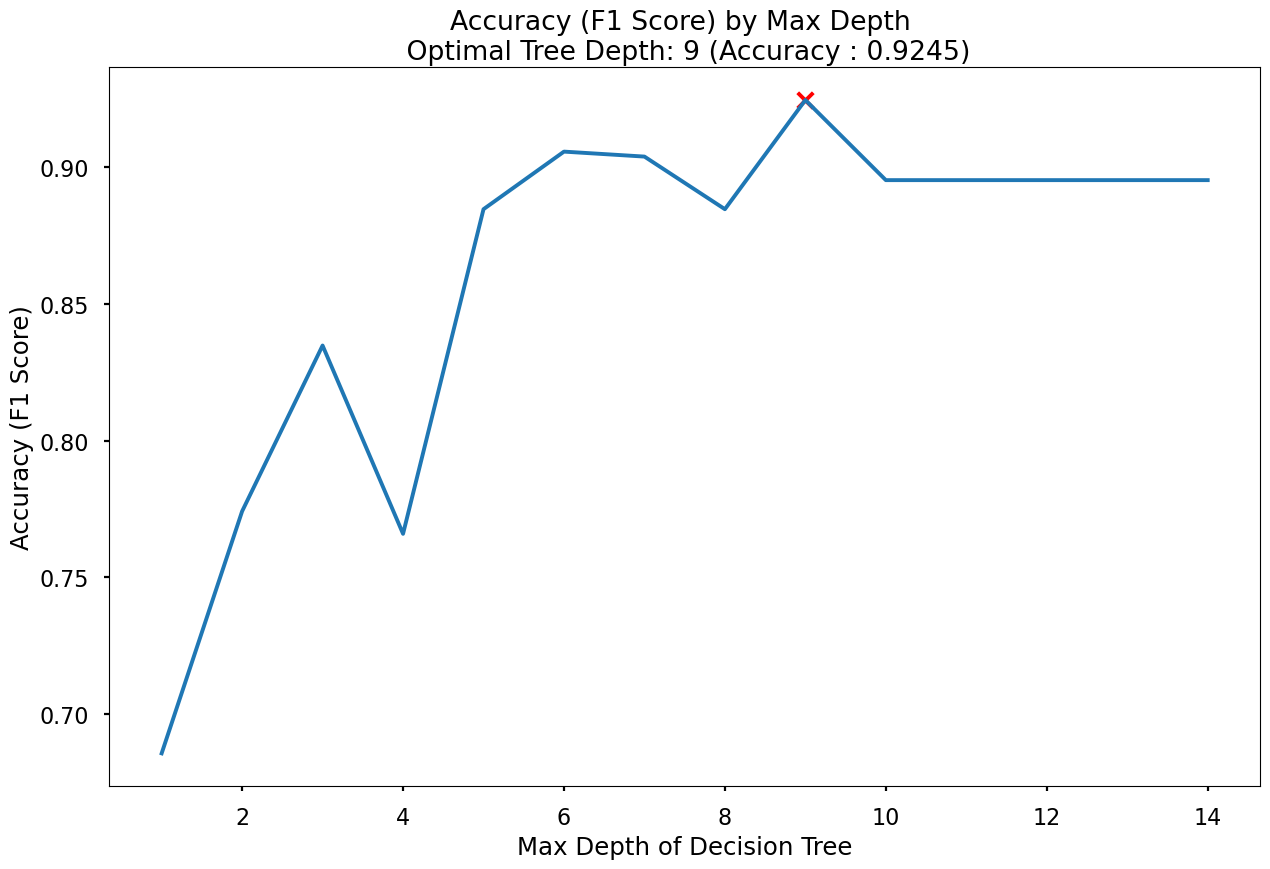

In [47]:
#plot of max depths
plt.plot(max_depth_list,accuracy_scores)
plt.scatter(optimal_depth,max_accuracy, marker="x", color = "red")
plt.title(f"Accuracy (F1 Score) by Max Depth \n Optimal Tree Depth: {optimal_depth} (Accuracy : {round(max_accuracy,4)})")
plt.xlabel("Max Depth of Decision Tree")
plt.ylabel("Accuracy (F1 Score)")
plt.tight_layout()
plt.show()

In [49]:
#Optimal depth is 9 with an increase to .92 accuracy
#Go back and change max depth to 9 if you want 

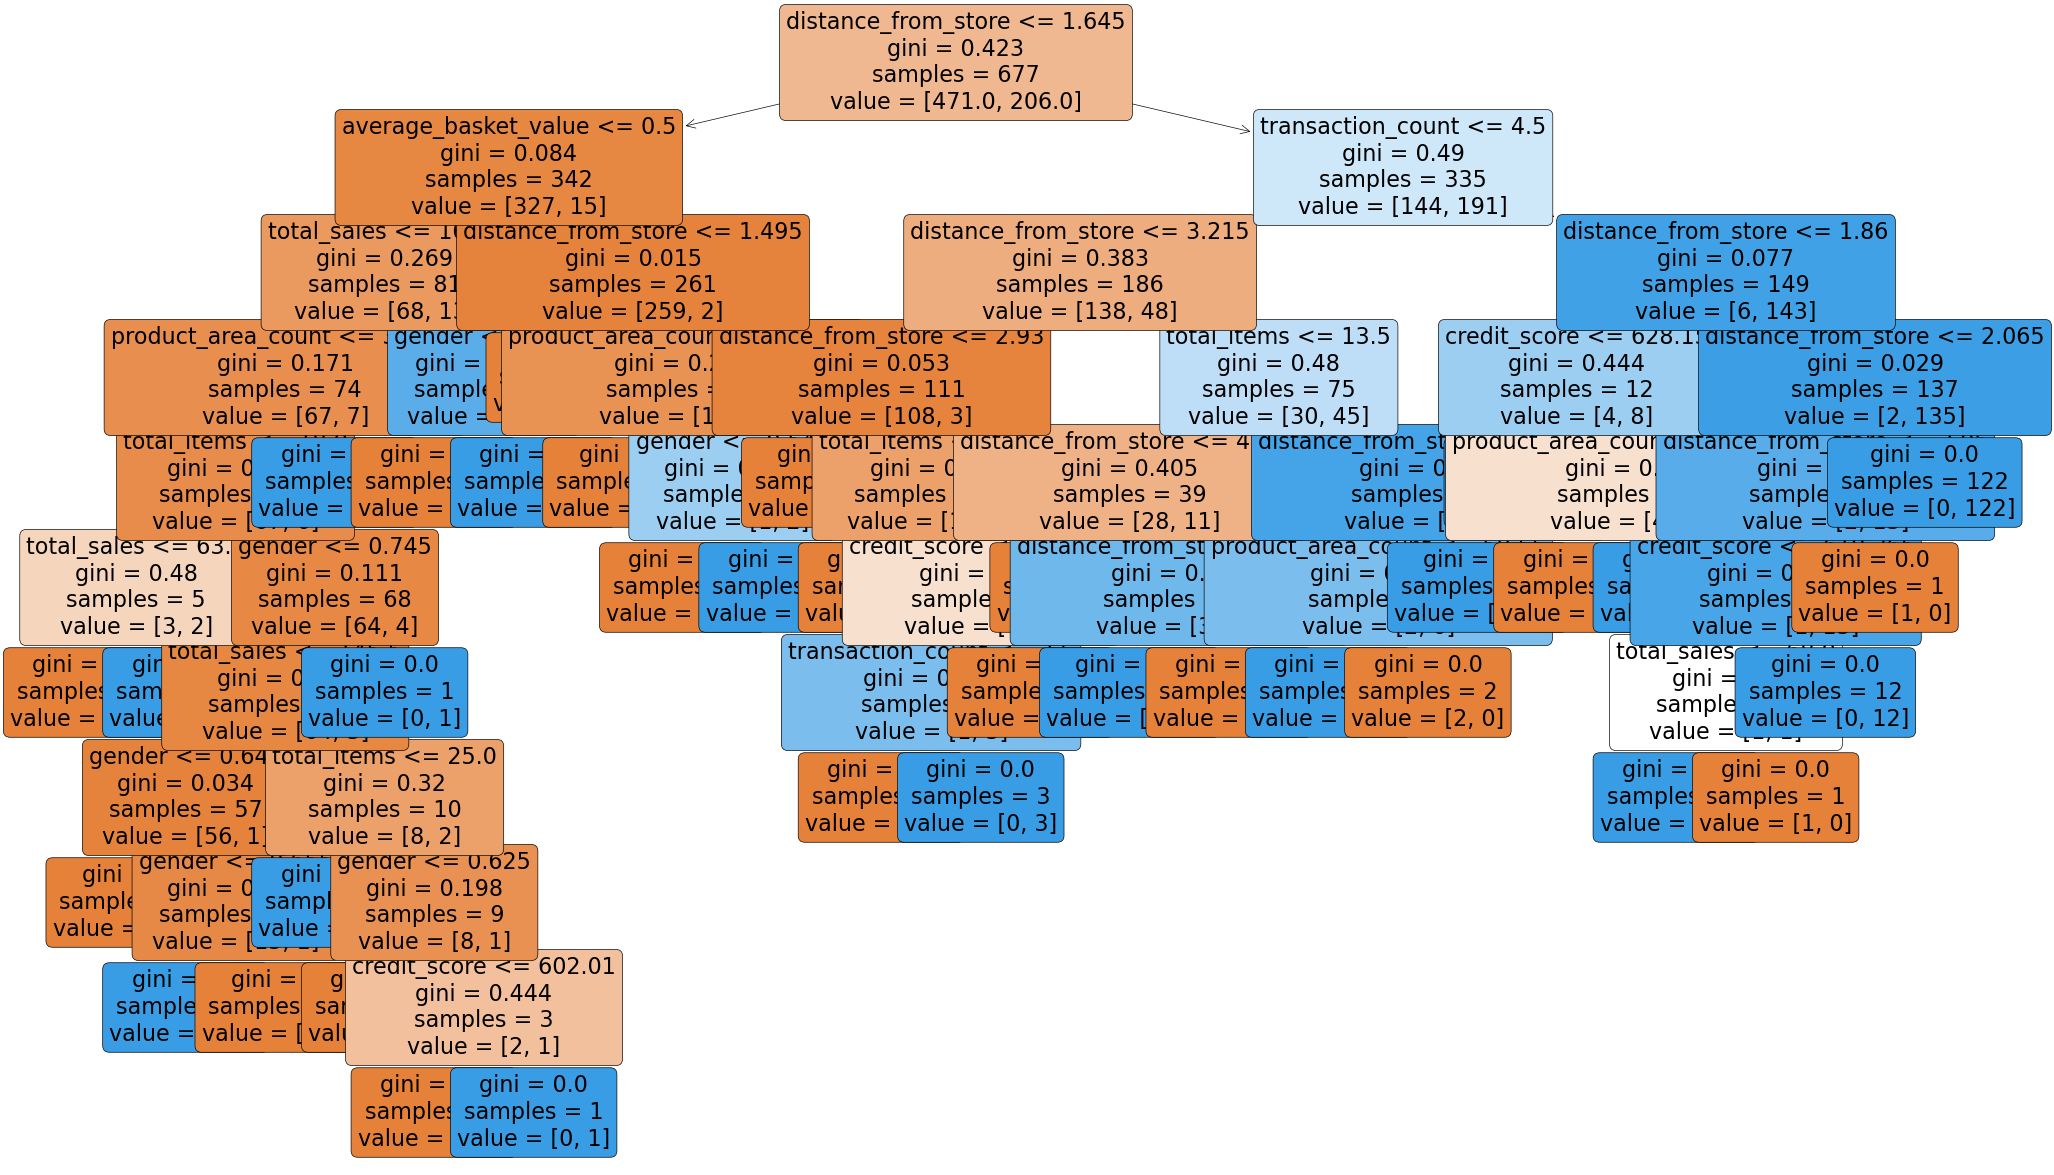

In [53]:
#Plot our model
plt.figure(figsize=(25,15))
tree = plot_tree(clf,
                 feature_names = X.columns,
                 filled = True,
                 rounded = True,
                fontsize = 16)

In [ ]:
#Distance of store is first variable split
